# Regularization:
*(is a hyperparameter, another thing you can add to your toolkit)*
*but if you choose wrong features, it won't save you*

**GOAL**: 
* reduce overfitting
* reduce the strengths of coeffients
* artificically add bias into the training process

### Task 1:

Let's try to create some data that roughly follows this equation:


$$ y = \sqrt x $$


Add in some random, normally-distributed noise in the data to make it a bit more interesting.

In [2]:
import numpy as np

In [3]:
X = np.arange(0, 60, 5)
y = [np.sqrt(x_val) + np.random.normal(0, 0.5) for x_val in X]

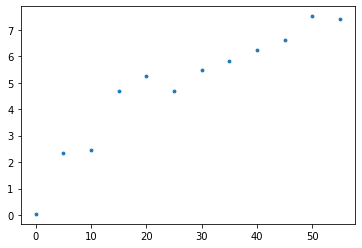

In [4]:
import matplotlib.pyplot as plt

plt.scatter(X, y, s=8)

---

### Task 2:

**Now let's intentionally overfit a model that focuses too much on training examples.**
- Use Polynomial Features

array([[ 0],
       [ 5],
       [10],
       [15],
       [20],
       [25],
       [30],
       [35],
       [40],
       [45],
       [50],
       [55]])

In [11]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

X = X.reshape(12, 1)

poly = PolynomialFeatures(degree=12) 
m = LinearRegression() 

X_poly = poly.fit_transform(X) 

m.fit(X_poly, y)

ypred = m.predict(X_poly)

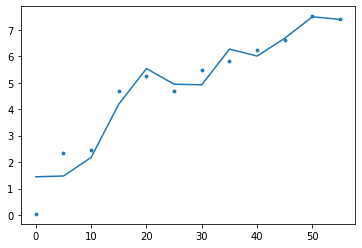

In [12]:
plt.scatter(X, y, s=8)
plt.plot(X, ypred)

### Task 3:

**Let's look at another extreme case. Generate similar data but purposely throw in some outliers.**

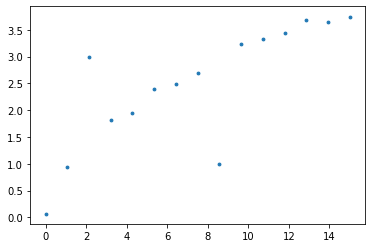

In [15]:
X = np.linspace(0, 15, 15).reshape(-1,1)
y = [np.sqrt(x_val) + np.random.normal(0,0.1) for x_val in X]

### Create some outliers intentionally
y[2] = 3
y[8] = 1

plt.scatter(X, y, s=8)

### Task 4:

**Observe the effect of regularization**

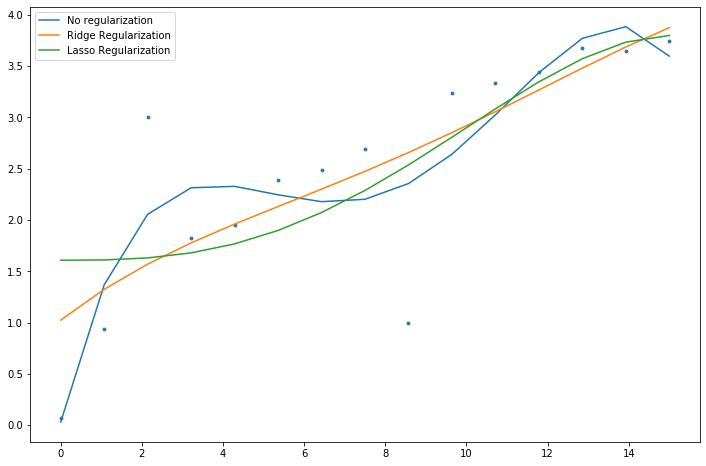

In [16]:
### Make model unnecessarily complex
poly = PolynomialFeatures(degree=4) #transformative model
X_poly = poly.fit_transform(X)

### Reduce the complexity through regularization
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet # combination of Ridge and Lasso
m = LinearRegression() 
m_ridge = Ridge(alpha=5.0)
m_lasso = Lasso(alpha=5.0)

m.fit(X_poly, y)       
m_ridge.fit(X_poly, y)  
m_lasso.fit(X_poly, y)  

ypred = m.predict(X_poly)
ypred_ridge = m_ridge.predict(X_poly)
ypred_lasso = m_lasso.predict(X_poly)

plt.figure(figsize=(12, 8))
plt.scatter(X, y, s=8)
plt.plot(X, ypred)
plt.plot(X, ypred_ridge)
plt.plot(X, ypred_lasso)
plt.legend(['No regularization', 'Ridge Regularization', 'Lasso Regularization'])

In [17]:
m.score(X_poly, y)

0.7673328494666374

 <span style="color: red;">**always do a little bit of regularization!** </span> -> will improve the result of the model a little bit

**Inspect Coefficients**

In [18]:
m.coef_

array([ 0.00000000e+00,  1.62926325e+00, -3.93887118e-01,  3.73294090e-02,
       -1.15028111e-03])

In [19]:
m_ridge.coef_

array([ 0.00000000e+00,  3.12705348e-01, -3.26848396e-02,  2.84277606e-03,
       -8.05765449e-05])

tries to get the coefficients closer to zero

In [21]:
m_lasso.coef_

array([ 0.        ,  0.        ,  0.        ,  0.00257792, -0.00012857])